# Impact of Base Stats on Hero Winrates

DOTA 2 is a complex game, with various factors deciding whether a team wins or loses. But let's see how much of an effect the base hero stats have on the winrate of various heroes in the game. 

Each hero has a primary attribute, Strength, Agility, Intelligence & then Universal, which is a mix of all 3. 

We will be analyzing the impact of their primary attributes on their winrate, as the secondary attributes can typically vary a lot more. 

For <I>Universal heroes</I>, this means that we will check <I>the total of all 3 stats</I>. 

For hero stats, we will be pulling the numbers from the DOTA 2 wiki. 

We will use the requests library and Pandas to do the same. 

In [1]:
import pandas as pd
import requests
StatURL='https://dota2.fandom.com/wiki/Table_of_hero_attributes'

### Importing the table from the wiki, and converting it into a pandas dataframe
StatHTML=requests.get(StatURL).content
df_list=pd.read_html(StatHTML)
df=df_list[0]
df.head()

,HERO,A,STR,STR+,STR30,AGI,AGI+,AGI30,INT,INT+,...,BAT,ATKPT,ATKBS,VS-D,VS-N,TR,COL,HP/S,MP/S,L
0,Abaddon,NaN,22,2.2,85.8,23,1.3,60.7,18,1.2,...,1.5,0.56,0.41,1800,800,0.6,27,3.20,1.15,2
1,Alchemist,NaN,23,2.7,101.3,22,1.5,65.5,25,1.8,...,1.7,0.35,0.65,1800,800,0.6,27,2.55,1.25,2
2,Ancient Apparition,NaN,20,1.9,75.1,20,2.2,83.8,23,3.1,...,1.7,0.45,0.30,1800,800,0.6,27,2.25,1.15,0
3,Anti-Mage,NaN,19,1.6,65.4,24,2.8,105.2,12,1.8,...,1.4,0.30,0.30,1800,800,0.6,27,2.65,0.60,2
4,Arc Warden,NaN,22,2.6,97.4,20,3.0,107.0,24,2.6,...,1.7,0.30,0.70,1800,800,0.7,27,2.45,1.20,2


In [2]:
### Checking if we have all the data
df.shape

(124, 30)

It seems we have succesfully pulled all the date, but there is one small problem. The Attribute column(column name- A) is missing in the table. 

This is because the attribute column contains the image of the attribute but not the text

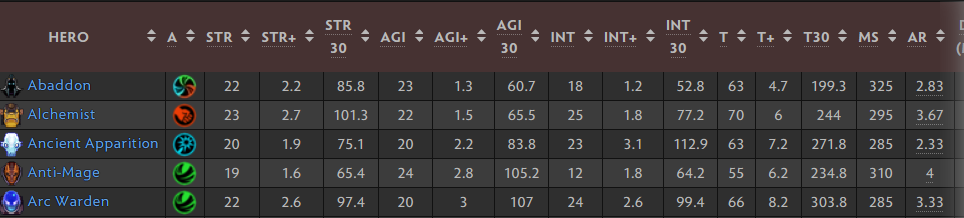

### But on inspecting the table, we can see that the alt text of the icons has the attribute names
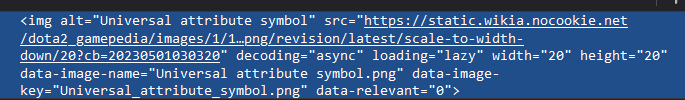

### To solve this, we can use the <b>BeautifulSoup</b> package to parse the HTML to find the image tags

In [3]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(StatHTML,'lxml')
# Isolating just our table in the page
stattable=soup.find_all('table')[0]

In [4]:
# Grabbing the image data from the table
images=stattable.find_all('img')

In [5]:
attribute=[]

In [6]:
# Isolating the alt tag from the images
for image in images:
    attribute.append(image['alt'])

#Converting the tags into a Pandas Dataframe
attribute=pd.DataFrame(attribute)

In [7]:
attribute.head()

,0
0,Abaddon minimap icon
1,Universal attribute symbol
2,Alchemist minimap icon
3,Strength attribute symbol
4,Ancient Apparition minimap icon


### We can see that the attribute icons, which contain the text 'attribute symbol' at the end. We can use this to isolate the attributes.

In [8]:
att_final=attribute.loc[attribute[0].str.contains('attribute symbol')]
att_final.shape

(124, 1)

It seems to be successful as the number of attributes match the number of heroes. But before we can add this to the table, we need to reset the index. 

In [9]:
att_final.reset_index(drop=True,inplace=True)

In [10]:
att_final

,0
0,Universal attribute symbol
1,Strength attribute symbol
2,Intelligence attribute symbol
3,Agility attribute symbol
4,Agility attribute symbol
...,...
119,Universal attribute symbol
120,Universal attribute symbol
121,Intelligence attribute symbol
122,Strength attribute symbol


In [11]:
df['A']=att_final[0]
df.head()

,HERO,A,STR,STR+,STR30,AGI,AGI+,AGI30,INT,INT+,...,BAT,ATKPT,ATKBS,VS-D,VS-N,TR,COL,HP/S,MP/S,L
0,Abaddon,Universal attribute symbol,22,2.2,85.8,23,1.3,60.7,18,1.2,...,1.5,0.56,0.41,1800,800,0.6,27,3.20,1.15,2
1,Alchemist,Strength attribute symbol,23,2.7,101.3,22,1.5,65.5,25,1.8,...,1.7,0.35,0.65,1800,800,0.6,27,2.55,1.25,2
2,Ancient Apparition,Intelligence attribute symbol,20,1.9,75.1,20,2.2,83.8,23,3.1,...,1.7,0.45,0.30,1800,800,0.6,27,2.25,1.15,0
3,Anti-Mage,Agility attribute symbol,19,1.6,65.4,24,2.8,105.2,12,1.8,...,1.4,0.30,0.30,1800,800,0.6,27,2.65,0.60,2
4,Arc Warden,Agility attribute symbol,22,2.6,97.4,20,3.0,107.0,24,2.6,...,1.7,0.30,0.70,1800,800,0.7,27,2.45,1.20,2


In [12]:
df.tail()

,HERO,A,STR,STR+,STR30,AGI,AGI+,AGI30,INT,INT+,...,BAT,ATKPT,ATKBS,VS-D,VS-N,TR,COL,HP/S,MP/S,L
119,Windranger,Universal attribute symbol,18,2.0,76.0,17,1.4,57.6,18,2.4,...,1.5,0.40,0.30,1800,800,0.8,27,2.05,1.15,2
120,Winter Wyvern,Universal attribute symbol,20,2.2,83.8,16,1.5,59.5,26,2.8,...,1.7,0.25,0.80,1800,800,0.6,27,2.25,1.30,2
121,Witch Doctor,Intelligence attribute symbol,18,2.1,78.9,13,1.4,53.6,22,3.1,...,1.7,0.40,0.50,1800,800,0.6,27,2.05,1.10,2
122,Wraith King,Strength attribute symbol,22,2.8,103.2,16,1.7,65.3,18,1.6,...,1.7,0.56,0.44,1800,800,0.6,27,2.70,0.90,2
123,Zeus,Intelligence attribute symbol,19,2.1,79.9,11,1.2,45.8,22,3.3,...,1.7,0.35,0.55,1800,800,0.6,27,2.15,1.10,2


### The attributes have been added successfully. Now, we need to remove the 'attribute symbol' text from the primary attributes. 

In [13]:
df['A']=df['A'].str.split(pat=' ',expand=True)[0]

In [14]:
df.head()

,HERO,A,STR,STR+,STR30,AGI,AGI+,AGI30,INT,INT+,...,BAT,ATKPT,ATKBS,VS-D,VS-N,TR,COL,HP/S,MP/S,L
0,Abaddon,Universal,22,2.2,85.8,23,1.3,60.7,18,1.2,...,1.5,0.56,0.41,1800,800,0.6,27,3.20,1.15,2
1,Alchemist,Strength,23,2.7,101.3,22,1.5,65.5,25,1.8,...,1.7,0.35,0.65,1800,800,0.6,27,2.55,1.25,2
2,Ancient Apparition,Intelligence,20,1.9,75.1,20,2.2,83.8,23,3.1,...,1.7,0.45,0.30,1800,800,0.6,27,2.25,1.15,0
3,Anti-Mage,Agility,19,1.6,65.4,24,2.8,105.2,12,1.8,...,1.4,0.30,0.30,1800,800,0.6,27,2.65,0.60,2
4,Arc Warden,Agility,22,2.6,97.4,20,3.0,107.0,24,2.6,...,1.7,0.30,0.70,1800,800,0.7,27,2.45,1.20,2


### We have the stats of the heroes. Now to extract data for the winrates. We can get them from dota2protracker. 

In [15]:
winrate_url = 'https://dota2protracker.com/'
winrate_html = requests.get(winrate_url).content
df1_list = pd.read_html(winrate_html)
df1 = df1_list[0]
df1.head()

,Hero,Winrate,Matches
0,Vengeful Spirit,51.9%,2475
1,Dawnbreaker,53.1%,2379
2,Treant Protector,59.2%,2121
3,Invoker,55.8%,2084
4,Gyrocopter,52.3%,2050


### Now let's merge the tables using the hero names, so that we can compare winrates to their stats. 

In [16]:
df=df.merge(df1,left_on='HERO',right_on='Hero')

In [17]:
###dropping the duplicated column
df.drop(columns='Hero',inplace=True)
df.head()

,HERO,A,STR,STR+,STR30,AGI,AGI+,AGI30,INT,INT+,...,ATKBS,VS-D,VS-N,TR,COL,HP/S,MP/S,L,Winrate,Matches
0,Abaddon,Universal,22,2.2,85.8,23,1.3,60.7,18,1.2,...,0.41,1800,800,0.6,27,3.20,1.15,2,35.2%,54
1,Alchemist,Strength,23,2.7,101.3,22,1.5,65.5,25,1.8,...,0.65,1800,800,0.6,27,2.55,1.25,2,47.2%,106
2,Ancient Apparition,Intelligence,20,1.9,75.1,20,2.2,83.8,23,3.1,...,0.30,1800,800,0.6,27,2.25,1.15,0,48.7%,392
3,Anti-Mage,Agility,19,1.6,65.4,24,2.8,105.2,12,1.8,...,0.30,1800,800,0.6,27,2.65,0.60,2,49.0%,196
4,Arc Warden,Agility,22,2.6,97.4,20,3.0,107.0,24,2.6,...,0.70,1800,800,0.7,27,2.45,1.20,2,53.3%,45


In [18]:
df.describe()

,STR,STR+,STR30,AGI,AGI+,AGI30,INT,INT+,INT30,T,...,ATKPT,ATKBS,VS-D,VS-N,TR,COL,HP/S,MP/S,L,Matches
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,...,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,21.250000,2.609677,96.930645,18.370968,2.079839,78.686290,19.862903,2.322581,87.217742,59.483871,...,0.403226,0.578734,1790.322581,825.806452,0.658065,26.564516,2.743952,1.120968,2.048387,610.887097
std,3.446749,0.634050,20.941215,4.672124,0.754281,25.259815,4.224079,0.872044,28.268883,5.765730,...,0.097326,0.240316,91.437797,141.921178,0.098853,1.939080,0.806140,0.350499,1.181530,542.503295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,...,0.170000,0.000000,800.000000,800.000000,0.600000,18.000000,0.250000,0.000000,0.000000,45.000000
25%,19.000000,2.200000,81.600000,15.000000,1.500000,58.600000,17.000000,1.700000,65.400000,55.000000,...,0.300000,0.432500,1800.000000,800.000000,0.600000,27.000000,2.250000,0.900000,2.000000,229.750000
50%,21.000000,2.500000,93.500000,18.000000,2.000000,73.950000,20.000000,2.100000,80.400000,59.500000,...,0.400000,0.545000,1800.000000,800.000000,0.600000,27.000000,2.575000,1.050000,2.000000,407.500000
75%,23.000000,3.000000,111.250000,22.000000,2.600000,96.725000,23.000000,3.000000,111.175000,64.000000,...,0.500000,0.700000,1800.000000,800.000000,0.700000,27.000000,3.000000,1.262500,2.000000,765.250000
max,30.000000,4.300000,150.700000,34.000000,4.000000,138.000000,30.000000,5.200000,174.800000,73.000000,...,0.650000,1.500000,1800.000000,1800.000000,0.900000,27.000000,7.700000,2.250000,8.000000,2475.000000


In [36]:
df.dtypes

HERO         object
A            object
STR           int64
STR+        float64
STR30       float64
AGI           int64
AGI+        float64
AGI30       float64
INT           int64
INT+        float64
INT30       float64
T             int64
T+          float64
T30         float64
MS            int64
AR          float64
DMG(MIN)      int64
DMG(MAX)      int64
RG            int64
AS            int64
BAT         float64
ATKPT       float64
ATKBS       float64
VS-D          int64
VS-N          int64
TR          float64
COL           int64
HP/S        float64
MP/S        float64
L             int64
Winrate      object
Matches       int64
dtype: object

### Converting winrate to a float

In [39]:
df['Winrate']=df['Winrate'].str.replace('%','').astype(float)/100

In [40]:
df.head()

,HERO,A,STR,STR+,STR30,AGI,AGI+,AGI30,INT,INT+,...,ATKBS,VS-D,VS-N,TR,COL,HP/S,MP/S,L,Winrate,Matches
0,Abaddon,Universal,22,2.2,85.8,23,1.3,60.7,18,1.2,...,0.41,1800,800,0.6,27,3.20,1.15,2,0.352,54
1,Alchemist,Strength,23,2.7,101.3,22,1.5,65.5,25,1.8,...,0.65,1800,800,0.6,27,2.55,1.25,2,0.472,106
2,Ancient Apparition,Intelligence,20,1.9,75.1,20,2.2,83.8,23,3.1,...,0.30,1800,800,0.6,27,2.25,1.15,0,0.487,392
3,Anti-Mage,Agility,19,1.6,65.4,24,2.8,105.2,12,1.8,...,0.30,1800,800,0.6,27,2.65,0.60,2,0.490,196
4,Arc Warden,Agility,22,2.6,97.4,20,3.0,107.0,24,2.6,...,0.70,1800,800,0.7,27,2.45,1.20,2,0.533,45


In [26]:
### Saving the DataFrame to a CSV
df.to_csv('DotaData.csv')

### Let's perform some exploratory analysis on the data. 

### Question 1
Who are the most played heroes in this patch? Is there any relationship between the winrates and matches?

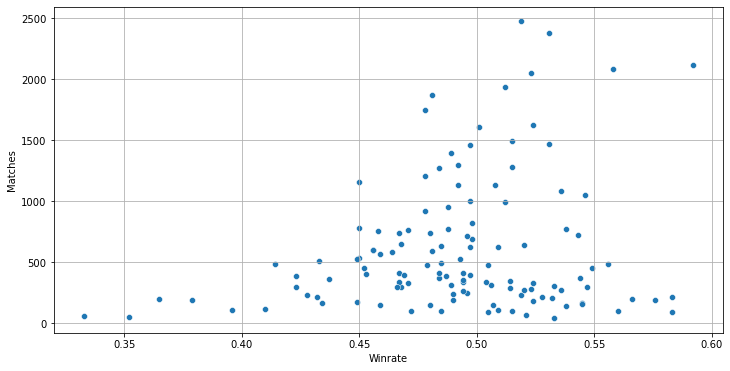

In [61]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Winrate',y='Matches')
plt.grid()

### Out of all the heroes with over 1500 matches, it seems like only 2 heroes have a winrate less than 50%. Let's take a look at that. 

In [41]:
df.sort_values(by='Matches',ascending=False).head(10)

,HERO,A,STR,STR+,STR30,AGI,AGI+,AGI30,INT,INT+,...,ATKBS,VS-D,VS-N,TR,COL,HP/S,MP/S,L,Winrate,Matches
112,Vengeful Spirit,Universal,20,2.1,80.9,21,2.1,81.9,19,1.2,...,0.640,1800,800,0.6,27,2.25,0.95,2,0.519,2475
22,Dawnbreaker,Strength,26,3.4,124.6,14,1.7,63.3,20,2.2,...,1.020,1800,800,0.6,27,2.85,1.00,2,0.531,2379
106,Treant Protector,Strength,25,3.4,123.6,15,1.8,67.2,20,1.8,...,0.400,1800,800,0.6,27,2.75,1.50,2,0.592,2121
40,Invoker,Universal,19,2.4,88.6,14,1.8,66.2,19,4.0,...,0.700,1800,800,0.6,27,3.40,0.95,2,0.558,2084
37,Gyrocopter,Agility,22,2.5,94.5,26,3.3,121.7,21,2.4,...,0.100,1800,800,0.6,27,2.45,1.05,2,0.523,2050
30,Earthshaker,Strength,22,3.7,129.3,12,1.4,52.6,18,2.1,...,0.863,1800,800,0.9,27,3.20,0.90,2,0.512,1935
74,Phantom Assassin,Agility,19,2.0,77.0,21,3.2,113.8,15,1.4,...,0.700,1800,800,0.8,27,2.90,0.75,2,0.481,1876
84,Rubick,Intelligence,21,2.0,79.0,23,2.5,95.5,25,3.1,...,0.770,1800,800,0.7,27,2.35,1.75,2,0.478,1751
73,Pangolier,Universal,19,2.7,97.3,18,2.5,90.5,16,1.9,...,0.770,1800,800,0.9,27,2.15,0.80,2,0.524,1623
29,Earth Spirit,Strength,22,3.8,132.2,17,2.4,86.6,20,2.1,...,0.650,1800,800,0.6,27,3.20,1.00,2,0.501,1614


### Vengeful Spirit and Dawnbreaker are two of the most popular heroes in this patch

### Two outliers here are Phantom Assassin and Rubick, as they are the only heroes who have a high number of Matches, but a winrate lower than 50%. 

### Doing some research shows that these two are fan favourite heroes, and hence the higher pickrates despite the lack of wins. 

### Question 2
Who has the highest winrates in the pro bracket in this patch?

In [62]:
df[['HERO','Winrate','Matches']].sort_values(by='Winrate',ascending=False).head(10)

,HERO,Winrate,Matches
106,Treant Protector,0.592,2121
70,Omniknight,0.583,96
52,Lone Druid,0.583,218
63,Muerta,0.576,191
118,Weaver,0.566,198
34,Enigma,0.560,100
40,Invoker,0.558,2084
9,Bloodseeker,0.556,486
72,Outworld Destroyer,0.549,455
16,Chen,0.547,300


### Some Heroes with high winrates have very few matches. Let's take a look only at Heroes who have matches over the top 25%.

<AxesSubplot:>

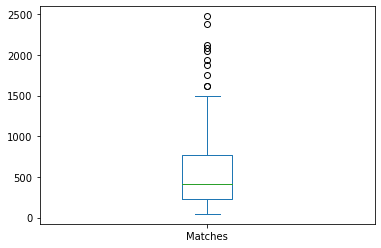

In [63]:
df['Matches'].plot(kind='box')

In [65]:
df['Matches'].describe()

count     124.000000
mean      610.887097
std       542.503295
min        45.000000
25%       229.750000
50%       407.500000
75%       765.250000
max      2475.000000
Name: Matches, dtype: float64

In [67]:
df.loc[df['Matches']>df['Matches'].quantile(0.75),['HERO','Winrate','Matches']].sort_values(by='Winrate',ascending=False).head(10)

,HERO,Winrate,Matches
106,Treant Protector,0.592,2121
40,Invoker,0.558,2084
65,Nature's Prophet,0.546,1049
41,Io,0.538,772
11,Brewmaster,0.536,1086
22,Dawnbreaker,0.531,2379
98,Sven,0.531,1467
73,Pangolier,0.524,1623
37,Gyrocopter,0.523,2050
112,Vengeful Spirit,0.519,2475


## Question 2 Answer
### We can see that Treant protector and Invoker are some of the best heroes in this patch - with over 2000 matches and above 55% winrate.

## Question 3
### Is there any relation between stats and winrates?

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
matrix = df.corr().round(2)

In [85]:
neworder=['Winrate', 'Matches','STR', 'STR+', 'STR30', 'AGI', 'AGI+', 'AGI30', 'INT', 'INT+', 'INT30',
       'T', 'T+', 'T30', 'MS', 'AR', 'DMG(MIN)', 'DMG(MAX)', 'RG', 'AS', 'BAT',
       'ATKPT', 'ATKBS', 'VS-D', 'VS-N', 'TR', 'COL', 'HP/S', 'MP/S', 'L']       

In [87]:
matrix=matrix.reindex(columns=neworder)

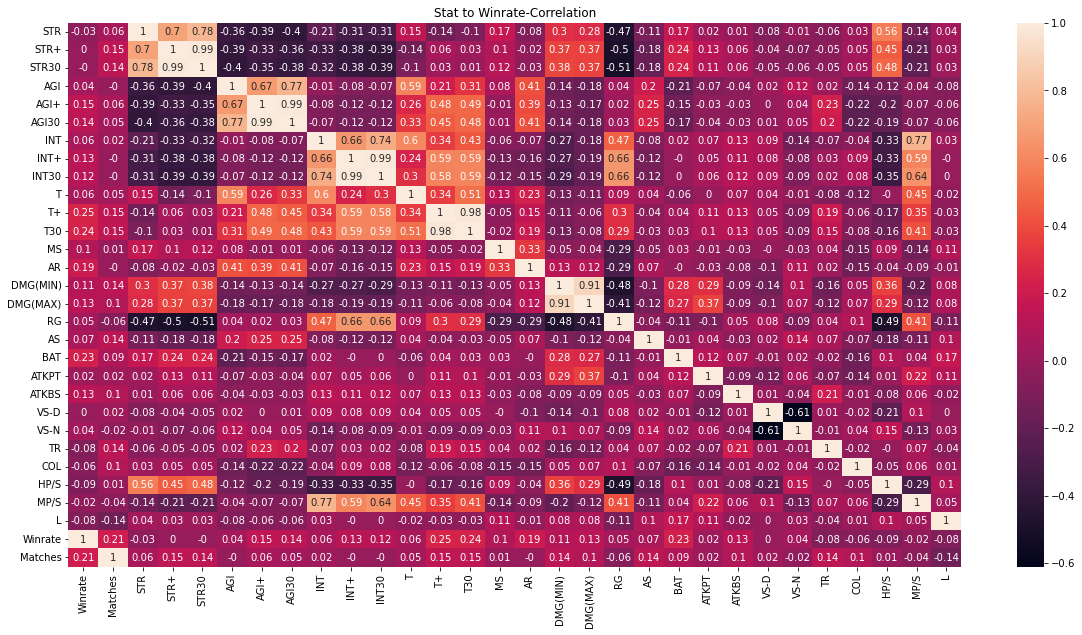

In [123]:
plt.figure(figsize=(20,10))
sns.heatmap(matrix, annot=True)
plt.title('Stat to Winrate-Correlation')
plt.show()

### As you can see, the correlation betweeen stats and winrates are weak ranging on non-existent. This shows that DOTA 2 is a complex game that goes beyond stats. 

## Question 4
### Which heroes have the highest primary attributes?

In [104]:
###Dividing the dataset by the attributes
str_heroes=df.loc[df['A']=='Strength']
agi_heroes=df.loc[df['A']=='Agility']
int_heroes=df.loc[df['A']=='Intelligence']
uni_heroes=df.loc[df['A']=='Universal']

### Strength Heroes with the highest lvl 30 Strength

In [117]:
str_heroes[['HERO','STR30']].sort_values(by='STR30',ascending=False).head()

,HERO,STR30
77,Primal Beast,150.7
105,Tiny,146.0
69,Ogre Magi,144.8
14,Centaur Warrunner,143.0
108,Tusk,136.1


### Agility heroes with the highest lvl 30 agility

In [118]:
agi_heroes[['HERO','AGI30']].sort_values(by='AGI30',ascending=False).head()

,HERO,AGI30
101,Terrorblade,138.0
62,Morphling,137.1
61,Monkey King,130.3
38,Hoodwink,128.4
53,Luna,122.6


### Intelligence heroes with the highest lvl 30 Intelligence

In [119]:
int_heroes[['HERO','INT30']].sort_values(by='INT30',ascending=False).head()

,HERO,INT30
80,Pugna,174.8
72,Outworld Destroyer,151.8
90,Skywrath Mage,141.9
50,Lina,140.2
71,Oracle,136.2


### Universal heroes with the highest lvl 30 all stats

In [120]:
uni_heroes[['HERO','T30']].sort_values(by='T30',ascending=False).head()

,HERO,T30
40,Invoker,289.8
6,Bane,286.5
103,Timbersaw,272.8
11,Brewmaster,268.7
16,Chen,268.7
